##  **_Βαμβακάς Παναγιώτης_**
## ge17090

---

### Παραδοτέο 1. 

Χρησιμοποιώντας μια παραλλαγή του κώδικα της προηγούμενης άσκησης για τον υπολογισμό νίκης μιας παρτίδας τεννις (με την μέθοδο *Monte Carlo*), δοθέντως την πιθανότητα πόντου $p$, θα σχεδιάσουμε την γραφική παράσταση της τυχαίας συνάρτησης $F(p)$ , και μέσω αυτής θα μπορέσουμε να σχολιάσουμε την κατανομή της τ.μ. $F$. 
Παρακάτω, βλέπουμε την υλοποίηση του κώδικα ως συνάρτηση της Python, με μεταβλητές `p`: πιθανότητα πόντου
                                                                                   `n`: αριθμός δειγμάτων

In [1]:
from simple_markov_chain_lib import markov_chain


def TennisWinProb(p: float, n: int) -> float:  # Function to compute probability of PlayerA winning, given
                                               # probability of point p and number of samples n.
    markov_table = {
        '0-0': {'15-0': p, '0-15': 1 - p},  # 1st row 

        '15-0': {'30-0': p, '15-15': 1 - p}, '0-15': {'15-15': p, '0-30': 1 - p},  # 2nd row

        '30-0': {'40-0': p, '30-15': 1 - p}, '15-15': {'30-15': p, '15-30': 1 - p},  # 3rd row
        '0-30': {'15-30': p, '0-40': 1 - p},

        '40-0': {'GameA': p, '40-15': 1 - p}, '30-15': {'40-15': p, 'Deuce': 1 - p},  # 4th row
        '15-30': {'Deuce': p, '15-40': 1 - p}, '0-40': {'15-40': p, 'GameB': 1 - p},

        '40-15': {'GameA': p, 'AdvA': 1 - p}, 'Deuce': {'AdvA': p, 'AdvB': 1 - p}, '15-40': {'AdvB': p, 'GameB': 1 - p},
        # 5th row

        'GameA': {'GameA': 1.}, 'AdvA': {'GameA': p, 'Deuce': 1 - p},  # 6th row
        'AdvB': {'Deuce': p, 'GameB': 1 - p}, 'GameB': {'GameB': 1.}
    }

    initial_dist = {'0-0': 1.}  # Every game starts from 0-0

    # Markov Chain construction
    mc = markov_chain(markov_table, initial_dist)
    counter = 0

    # Simulation
    for i in range(n):
        mc.start()  # new experiment
        while True:
            mc.move()
            if mc.running_state == 'GameA':
                counter += 1
                break
            elif mc.running_state == 'GameB':
                break

    phat: float = counter / n

    return phat

Και τώρα για τον κώδικα υλοποίησης της γραφικής παράστασης, με $p = 0.02, 0.04, \ldots,0.98$.
Η υλοποίηση του παρακάτω κώδικα ενδέχεται να είναι λίγο αργή, λόγω των πολλών επαναλήψεων( `n=25000`) για να βγεί ομαλή η γραφική μας.

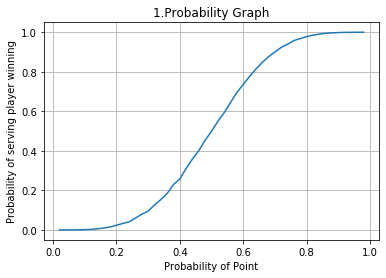

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


p = np.arange(.02, 1.0, .02)
f = []   #The list where we will be saving the win probability

for i in p:
    f.append(TennisWinProb(i, 25000))

f = np.array(f)   #Conversion of the list to a np array for plotting

plt.figure()

plt.plot(p, f)
plt.xlabel('Probability of Point')
plt.ylabel('Probability of serving player winning')
plt.title('1.Probability Graph')
plt.grid(True)  # add grid-lines

Η μορφή του γραφίματος 1 μας υποδεικνύει πως η τυχαία συνάρτηση $F(p)$ ακολουθεί κανονική κατανομή, αφού η ευθεία είναι το γράφημα της συνάρτησης κατανομής μιας κανονικής τυχαίας μεταβλητής, όπως βλέπουμε και στην παρακάτω εικόνα.

![Normal Distribution CDF](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/640px-Normal_Distribution_CDF.svg.png "Normal Distribution CDF")

   __Source: Wikipedia__

----

### Παραδοτέο 2.

Στη συγκεκριμένη άσκηση, για την δοθείσα μαρκοβιανή αλυσίδα, θα υπολογίσουμε τη μεταβολή της διασποράς της εκτιμήτριας *Monte Carlo* $Ε_Ν$, όσο μεταβάλουμε το πλήθος των δειγμάτων $N$. Θα παρουσιάσουμε τα αποτελέσματά μας σε δύο γραφήματα $Var(E_N) - N$, σε κανονική και λογαριθμική κλίμακα, όπου $E_N$ : εκτιμήτρια του χρόνου απορρόφησης της αλυσίδας για $N=2^5, \dots, 2^{12}$ δείγματα.

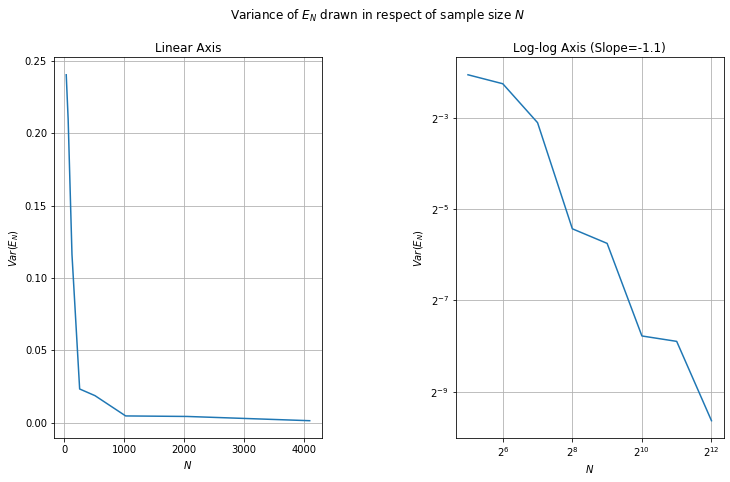

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from simple_markov_chain_lib import markov_chain  # import markov chain simulator


%matplotlib inline


def montecarloEst(n: int) -> float:   # Simulation of the markov chain as a function of variable n:Sample size(N)

    markov_table = {             # Transition Table
        0: {1: .5, 2: .5},      
        1: {0: 1/3, 3: 2/3},
        2: {2: 1.},
        3: {0: .5, 3: .25, 4: .25},
        4: {4: 1.}
    }

    # Initial Distribution
    init_dist = {0: 1.}  

    mc = markov_chain(markov_table, init_dist)

    sample_size = n  # Ν
    running_total = 0

    for i in range(sample_size):
        mc.start()
        while mc.running_state != 2 and mc.running_state != 4:
            mc.move()
        running_total += mc.steps  # steps it took to be absorbed

    mc_estimate = running_total / sample_size
    return mc_estimate

#Experiment set-up
samplesizes = 2 ** np.arange(5, 13)  # Vector with the sample sizes (N) of our experiment 
M = 30                               # Samples for each N
Var = []                             # List of Var(En)

for n in samplesizes:
    En = []                          # List of the Monte Carlo estimates (En)
    for m in range(M+1):
        En.append(montecarloEst(n))
    Var.append(stat.variance(En))

Var = np.array(Var)
p = np.polyfit(np.log2(samplesizes), np.log2(Var), 1)       # Polynomial curve fit for our log data; p[0] gives line slope.

plt.figure(figsize=(12, 7))  # define figure size
plt.suptitle('Variance of $E_N$ drawn in respect of sample size $N$')

# Right Axes
plt.subplot(1, 2, 1)
plt.plot(samplesizes, Var)
plt.xlabel('$N$')
plt.ylabel('$Var(E_N)$')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2)
plt.loglog(samplesizes, Var, basex=2, basey=2)
plt.xlabel('$N$')
plt.ylabel('$Var(E_N)$')
plt.title('Log-log Axis (Slope={:.2})'.format(p[0]))
plt.grid(True)

plt.subplots_adjust(wspace=0.5)  # specify the width space

Όπως βλέπουμε, όσο αυξάνουμε το πλήθος των δειγμάτων μας, η διασπορά του χρόνου απορρόφησης μειώνεται $\sim \frac{1}{x^2}$ , πράγμα που περιμέναμε αφού $E_N = \frac {\sum{T_i}}{N}$, $T_i$: χρόνοι απορρόφησης, και η συνάρτηση $Var(E_N)$ είναι τετραγωνική συνάρτηση της $E_N$, άρα $Var(E_N) \sim \frac{1}{Ν^2}$. Άρα τα αριθμητικά μας αποτελέσματα συμβαδίζουν με την θεωρία μας. Η μη ομαλή μορφή των γραφιμάτων οφείλεται στο μικρό πλήθος των $M$ δειγμάτων της $E_N$.